In [1]:
import glob
import numpy as np
s=[f'{i}' for i in range(1,40)]
print(s)
d=[]
for m in s: 
    d.append(glob.glob(f"dataset/s{m}/*.pgm"))
d= np.concatenate(d)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


In [5]:
import cv2
i0= d[0].split('/')[1][1:]
face_matrix=np.array(cv2.imread(d[0], cv2.IMREAD_GRAYSCALE)).reshape(1,-1)
label=[i0]
for img_path in d[1:]:
    i= np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)).reshape(1,-1)
    label.append(img_path.split('/')[1][1:])
    i1= np.array(i).flatten()
    face_matrix=np.vstack((face_matrix,i1))


In [55]:
def show_img(vector):
    plt.imshow(vector.reshape(112,92), cmap='gray')

In [6]:
face_matrix.shape

(390, 10304)

In [10]:
mean_face= face_matrix.mean(axis=0)

In [15]:
mean_face_matrix= face_matrix.copy()
mean_face_matrix= face_matrix-mean_face

In [16]:
mean_face.shape

(10304,)

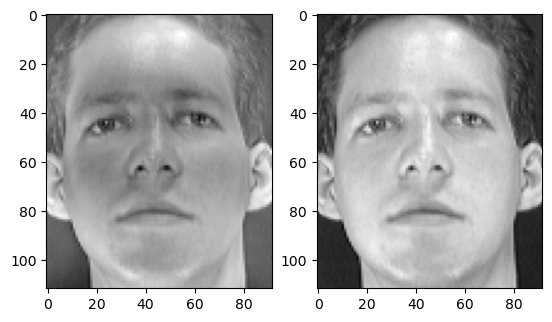

In [17]:
import matplotlib.pyplot as plt
ex= mean_face_matrix[0].reshape(112,92)
ex_mean= (mean_face_matrix[0]+mean_face).reshape(112,92)
fig, ax= plt.subplots(nrows=1, ncols=2)
ax[0].imshow(ex, cmap='gray')
ax[1].imshow(ex_mean, cmap='gray')


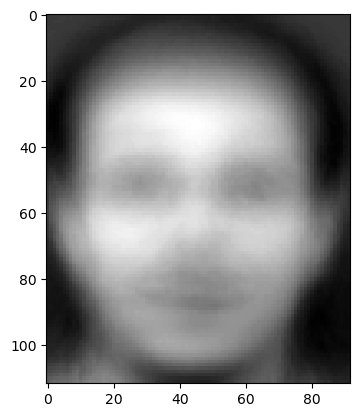

In [39]:
plt.imshow((meanFace).reshape(112,92), cmap='gray')

In [40]:
covMat= np.dot(mean_face_matrix, mean_face_matrix.T)
covMat.shape

(390, 390)

In [42]:
eigenValues, eigenVectors= np.linalg.eig(covMat)
eigenValues.shape, eigenVectors.shape

((390,), (390, 390))

In [45]:
idx= eigenValues.argsort()[::-1]
eigenValues=eigenValues[idx]
eigenVectors= eigenVectors[:,idx]
print(eigenValues.shape, eigenVectors.shape)

(390,) (390, 390)


In [46]:
eigenValues = np.absolute(eigenValues)
eigenVectors = np.absolute(eigenVectors)
print(eigenValues[0], eigenValues[1], eigenValues[-1])

1118092455.1802297 811390562.3890107 1.4663783324633295e-09


In [64]:
eigenFaces= np.dot(mean_face_matrix.T, eigenVectors)
eigenFaces = np.absolute(eigenFaces).T
eigenFaces.shape

(390, 10304)

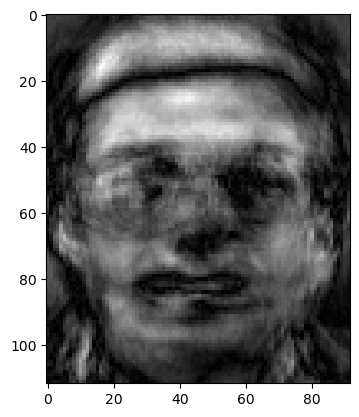

In [66]:
show=eigenFaces
plt.imshow(show[0].reshape(112,92), cmap='gray')

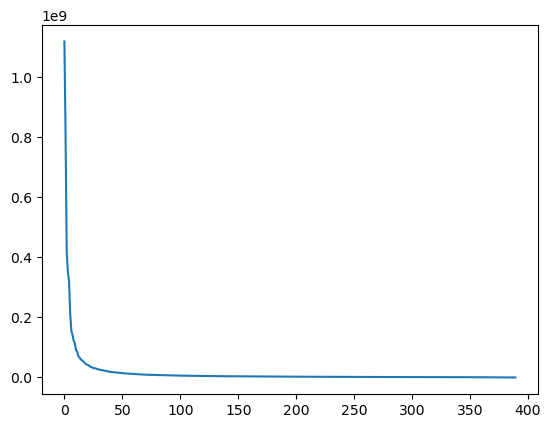

In [67]:
plt.plot(eigenValues)

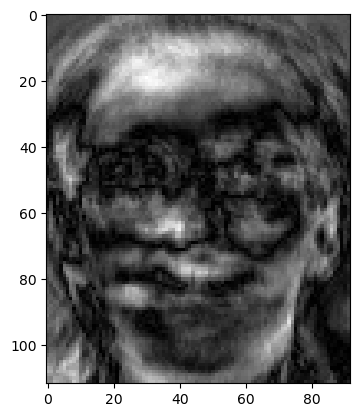

In [80]:
k=25
selected_eigenValues= eigenValues[:k]
selected_eigenFaces= eigenFaces[:k]
show_img(selected_eigenFaces[14])

In [59]:
eigenVectors.shape

(390, 390)

In [72]:
selected_eigenFaces.shape

(25, 10304)

# The next cell projects all of the training faces onto the eigenspaces. We represent each training face in terms of the eigenfaces, where each face is a weighted summation of the eigenfaces.

In [77]:
W= np.zeros((mean_face_matrix.shape[0],25))
for i,mean_img in enumerate(mean_face_matrix):
    w=np.zeros((25,))
    for idx in range(len(w)):
        w[idx]=np.dot(mean_img.T,selected_eigenFaces[idx].T)
    W[i]=w

In [96]:
W.shape

(390, 25)

In [93]:
def predict_img(img, eigenFaces, mean_face, eigenWeight, label):
    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_mean= np.array(img).reshape(1,-1)- mean_face
    w=np.zeros((25,))
    for idx in range(len(w)):
        w[idx]= np.dot(img_mean, eigenFaces[idx].T)
    diff= np.linalg.norm(eigenWeight- w, axis=1)
    idx= diff.argmin()
    print(label[idx])

In [95]:
img=cv2.imread(d[14])
predict_img(img=img, eigenFaces=selected_eigenFaces, mean_face=mean_face, eigenWeight=W, label=label)

2
